In [2]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt
from math import radians,cos,sin,asin,sqrt
import geopandas as gpd
import simplejson as json


PROJ: proj_create_from_database: SQLite error on SELECT name, type, coordinate_system_auth_name, coordinate_system_code, datum_auth_name, datum_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM geodetic_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name


In [3]:
#pip install simplejson

In [4]:
#importing data

rats=pd.read_csv('Rat_Sightings.csv')

In [5]:
rats.head(10)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31464015,9/4/2015 0:00,9/18/2015 0:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.707772,-74.012963,"(40.70777155363643, -74.01296309970473)"
1,31464024,9/4/2015 0:00,10/28/2015 0:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10306.0,2270 HYLAN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.575209,-74.104547,"(40.575209242947444, -74.1045465185469)"
2,31464025,9/4/2015 0:00,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10310.0,758 POST AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.631236,-74.126878,"(40.63123555151668, -74.12687759748677)"
3,31464026,9/4/2015 0:00,9/14/2015 0:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206.0,198 SCHOLES STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708987,-73.941207,"(40.70898692345805, -73.94120690238431)"
4,31464027,9/4/2015 0:00,9/22/2015 0:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462.0,2138 WALLACE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.854130,-73.864813,"(40.85413014360452, -73.86481331044513)"
5,31464188,9/4/2015 0:00,9/22/2015 0:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11231.0,179 LUQUER STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.677223,-73.998713,"(40.67722299833378, -73.99871293635606)"
6,31464195,9/4/2015 0:00,9/22/2015 16:26,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11354.0,33-38 PARSONS BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.767627,-73.824112,"(40.767627333732726, -73.82411151243869)"
7,31464199,9/4/2015 0:00,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,11205.0,143 CLASSON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.695878,-73.961500,"(40.69587826384473, -73.96149989735699)"
8,31464220,9/4/2015 0:00,8/19/2015 0:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Public Stairs,10010.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740184,-73.986363,"(40.74018431877025, -73.986362997997)"
9,31464802,9/4/2015 0:00,9/25/2015 0:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10303.0,30 ANDROS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.637298,-74.162365,"(40.637298077884196, -74.16236493414125)"


In [6]:
rats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101914 entries, 0 to 101913
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      101914 non-null  int64  
 1   Created Date                    101914 non-null  object 
 2   Closed Date                     90983 non-null   object 
 3   Agency                          101914 non-null  object 
 4   Agency Name                     101914 non-null  object 
 5   Complaint Type                  101914 non-null  object 
 6   Descriptor                      101914 non-null  object 
 7   Location Type                   101908 non-null  object 
 8   Incident Zip                    101578 non-null  float64
 9   Incident Address                92840 non-null   object 
 10  Street Name                     92839 non-null   object 
 11  Cross Street 1                  85257 non-null   object 
 12  Cross Street 2  

In [7]:
map_df=rats[['Incident Zip','Incident Address','Latitude','Longitude']]
map_df.head(20)

,Incident Zip,Incident Address,Latitude,Longitude
0,10006.0,NaN,40.707772,-74.012963
1,10306.0,2270 HYLAN BOULEVARD,40.575209,-74.104547
2,10310.0,758 POST AVENUE,40.631236,-74.126878
3,11206.0,198 SCHOLES STREET,40.708987,-73.941207
4,10462.0,2138 WALLACE AVENUE,40.854130,-73.864813
5,11231.0,179 LUQUER STREET,40.677223,-73.998713
6,11354.0,33-38 PARSONS BOULEVARD,40.767627,-73.824112
7,11205.0,143 CLASSON AVENUE,40.695878,-73.961500
8,10010.0,NaN,40.740184,-73.986363
9,10303.0,30 ANDROS AVENUE,40.637298,-74.162365


DATA CLEANSING: the below code is used to clean out all NaN values in the dataset. 

In [8]:
map_df=map_df.dropna(subset=['Longitude'])
map_df=map_df.dropna(subset=['Latitude'])
map_df=map_df.dropna(subset=['Incident Zip'])
map_df=map_df.dropna(subset=['Incident Address'])

In addition to removing all NaN values, the below code is used to remove duplicate sightings. We then have a finalized dataframe that provides each unique sighting within NYC and its corresponding coordinates.

In [9]:
#removing NaNs

map_df.drop_duplicates(subset=None,keep='first',inplace=False)

,Incident Zip,Incident Address,Latitude,Longitude
1,10306.0,2270 HYLAN BOULEVARD,40.575209,-74.104547
2,10310.0,758 POST AVENUE,40.631236,-74.126878
3,11206.0,198 SCHOLES STREET,40.708987,-73.941207
4,10462.0,2138 WALLACE AVENUE,40.854130,-73.864813
5,11231.0,179 LUQUER STREET,40.677223,-73.998713
...,...,...,...,...
101897,10302.0,87 SIMONSON PLACE,40.632535,-74.131088
101898,11436.0,116-26 139 STREET,40.679203,-73.802536
101900,11434.0,168-10 127 AVENUE,40.678063,-73.773885
101903,10026.0,65 ST NICHOLAS AVENUE,40.801010,-73.952536


In [10]:
map_df.head(50)

,Incident Zip,Incident Address,Latitude,Longitude
1,10306.0,2270 HYLAN BOULEVARD,40.575209,-74.104547
2,10310.0,758 POST AVENUE,40.631236,-74.126878
3,11206.0,198 SCHOLES STREET,40.708987,-73.941207
4,10462.0,2138 WALLACE AVENUE,40.854130,-73.864813
5,11231.0,179 LUQUER STREET,40.677223,-73.998713
6,11354.0,33-38 PARSONS BOULEVARD,40.767627,-73.824112
7,11205.0,143 CLASSON AVENUE,40.695878,-73.961500
9,10303.0,30 ANDROS AVENUE,40.637298,-74.162365
10,11226.0,608 EAST 16 STREET,40.635362,-73.962382
11,11238.0,CLIFTON PLACE,40.687981,-73.961277


In [11]:
#NYC Boroughs ranked by Sightings 

rats['Borough'].value_counts()

BROOKLYN         34673
MANHATTAN        26803
BRONX            20706
QUEENS           14811
STATEN ISLAND     4920
Unspecified          1
Name: Borough, dtype: int64

Here we can see Brooklyn has the highest count of rat sightings amongst all boroughs in NYC, followed by Manhattan and the Bronx. Staten Island has the lowest count of rat sightings, followed by Queens with the second lowest count. 

C:\Users\Luis Durango\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


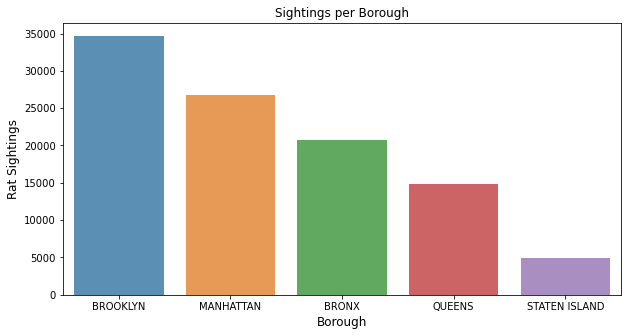

Borough
BRONX            26
BROOKLYN         44
MANHATTAN        55
QUEENS           62
STATEN ISLAND    13
dtype: int64

In [12]:
Borough_Sightings = rats['Borough'].value_counts()
Borough_Sightings = Borough_Sightings[:5,]
plt.figure(figsize=(10,5))
sns.barplot(Borough_Sightings.index, Borough_Sightings.values, alpha=0.8)
plt.title('Sightings per Borough')
plt.ylabel('Rat Sightings', fontsize=12)
plt.xlabel('Borough', fontsize=12)
plt.show()


ziptable = rats[['Incident Zip','Borough']].value_counts()
ziptable.groupby(by=['Borough']).count()

While Brooklyn has the most rat sightings per the above bar chart, Manhattan and Queens are the top two boroughs with the most zip codes (55 and 62 respectively). Queens with the most zip codes of any borough has the second lowest sighting count. 

In [13]:
#Sightings per Location Types 

rats['Location Type'].value_counts()

3+ Family Apt. Building          41061
1-2 Family Dwelling              19702
Other (Explain Below)            15044
3+ Family Mixed Use Building      7991
Commercial Building               5007
Vacant Lot                        3639
Construction Site                 2293
Vacant Building                   1879
1-2 Family Mixed Use Building     1754
Catch Basin/Sewer                 1079
Parking Lot/Garage                 875
Public Garden                      515
Government Building                282
School/Pre-School                  185
Single Room Occupancy (SRO)        175
Day Care/Nursery                   130
Public Stairs                      120
Office Building                     87
Hospital                            83
Summer Camp                          7
Name: Location Type, dtype: int64

3+ Family Apt. Buildings are exponentially the most common location type for rat sightings throught the city. 1-2 Family Dwellings are the second most common location type for sightings. Location types are a range between residential and commercial areas with a handful of public/vacant areas spread throughout.  

C:\Users\Luis Durango\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


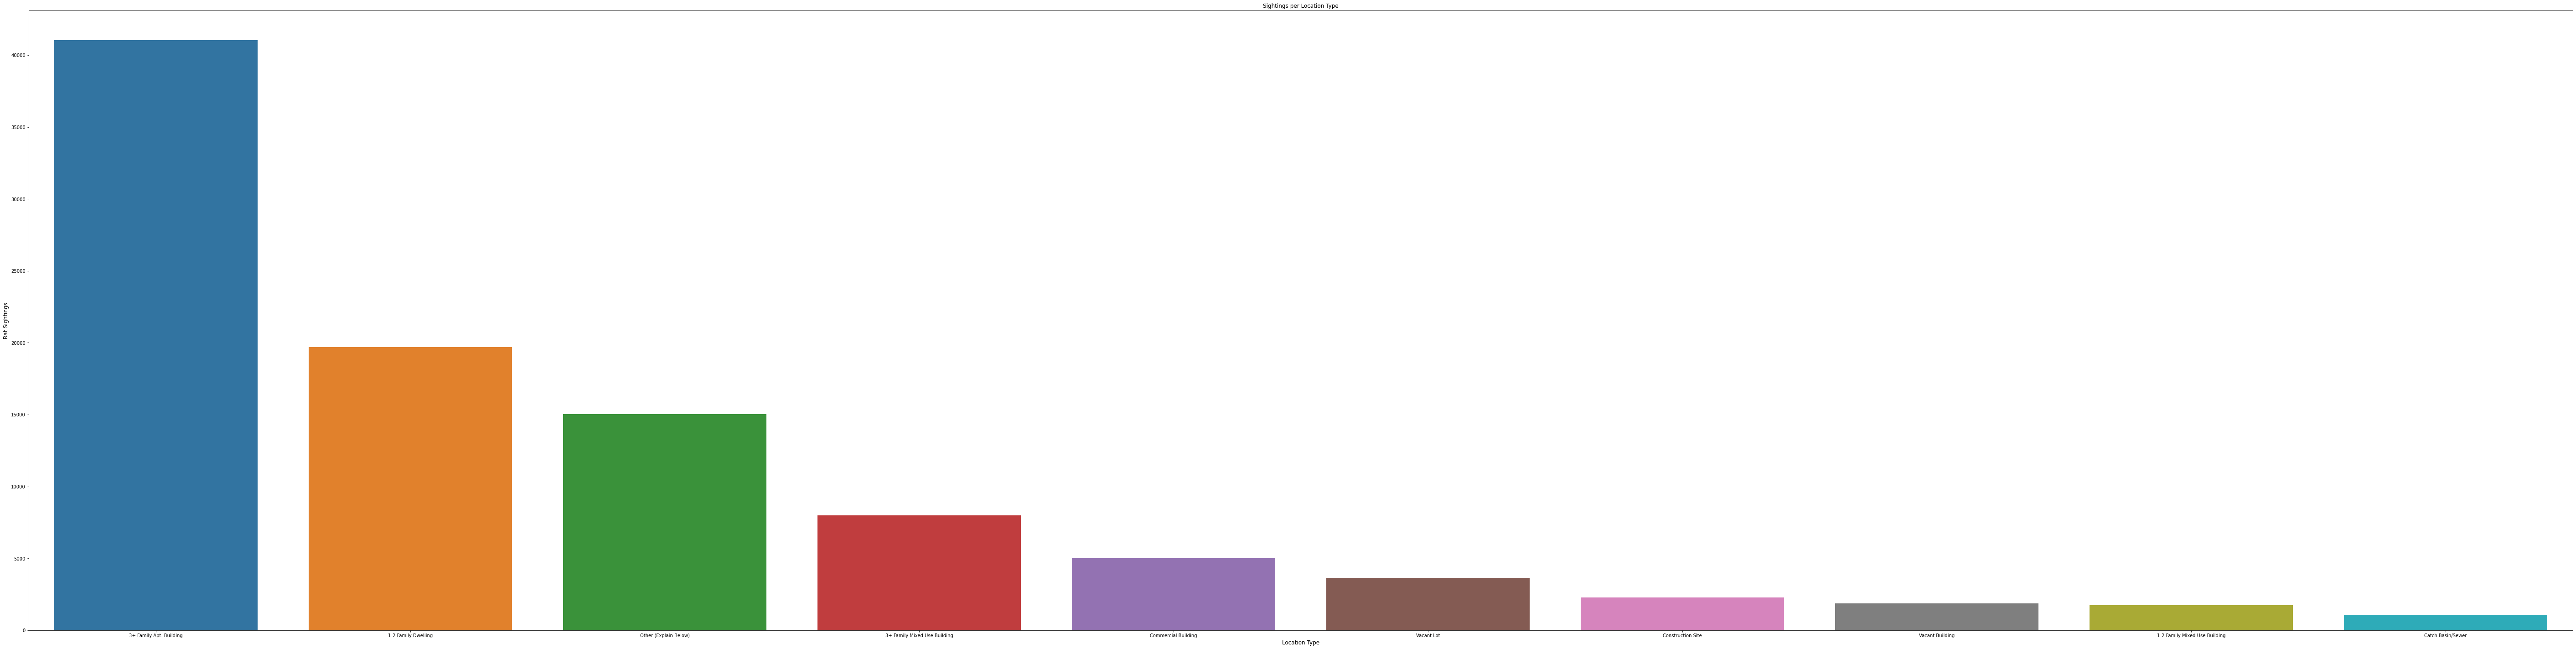

In [14]:
Location_Sightings = rats['Location Type'].value_counts()
Location_Sightings = Location_Sightings[:10,]
plt.figure(figsize=(100,25))
sns.barplot(Location_Sightings.index, Location_Sightings.values, alpha=1)
plt.title('Sightings per Location Type')
plt.ylabel('Rat Sightings', fontsize=12)
plt.xlabel('Location Type', fontsize=12)
plt.show()

In [16]:
#Creating sub-dataframe to visualize concentration of sightings by zip code 

all_zips = rats['Incident Zip'].value_counts().to_frame().rename_axis('Zip Code').reset_index()
all_zips

,Zip Code,Incident Zip
0,11221.0,3124
1,11216.0,2494
2,10025.0,2285
3,11238.0,2158
4,11233.0,1925
...,...,...
186,11242.0,1
187,100354.0,1
188,1123.0,1
189,10121.0,1


In [34]:
#Sightings by zip code; converting zip codes into integer format

allzips = all_zips

allzips['Zip Code'] = allzips['Zip Code'].astype(int)
allzips['Zip Code'] = allzips['Zip Code'].astype(str)
allzips['Incident Zip'] = allzips['Incident Zip'].astype(int)

allzips.info()
allzips

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Zip Code      191 non-null    object
 1   Incident Zip  191 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 2.4+ KB


,Zip Code,Incident Zip
0,11221,3124
1,11216,2494
2,10025,2285
3,11238,2158
4,11233,1925
...,...,...
186,11242,1
187,100354,1
188,1123,1
189,10121,1


In [35]:
#visualizing ALL neighborhoods

import folium

def create_map(all_zips, add_text = ''):
    m = folium.Map(location = [40.7128, -74.0060], zoom_start = 11)
    m.choropleth(
        geo_data = new_json,
        fill_opacity = 0.7,
        line_opacity = 0.2,
        data = all_zips,
        key_on = 'feature.properties.postalCode',
        columns = ['Zip Code','Incident Zip'],
        fill_color = 'YlGn',
        legend_name = 'All Neighborhoods with Reported Sightings Across NYC'
    )
    folium.LayerControl().add_to(m)
    m.save(outfile = 'All Sightings.html')

In [43]:
create_map(allzips)

C:\Users\Luis Durango\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [38]:
#Neighborhoods by zipcode with 1,000+ sightings  

top_zips = rats['Incident Zip'].value_counts().to_frame().rename_axis('Zip Code').reset_index()
top_zips = top_zips.iloc[:34]
print(top_zips)

    Zip Code  Incident Zip
0    11221.0          3124
1    11216.0          2494
2    10025.0          2285
3    11238.0          2158
4    11233.0          1925
5    10467.0          1803
6    10456.0          1770
7    11207.0          1666
8    10457.0          1652
9    11385.0          1619
10   10458.0          1574
11   11213.0          1448
12   11206.0          1448
13   10031.0          1435
14   11217.0          1432
15   10027.0          1416
16   11237.0          1369
17   11211.0          1363
18   11226.0          1355
19   11215.0          1334
20   10002.0          1299
21   10468.0          1290
22   10024.0          1269
23   10128.0          1244
24   10453.0          1240
25   10026.0          1218
26   10452.0          1180
27   10009.0          1179
28   10029.0          1079
29   10459.0          1063
30   10032.0          1059
31   11203.0          1058
32   11212.0          1046
33   10460.0          1000


In [39]:
top_zips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Zip Code      34 non-null     float64
 1   Incident Zip  34 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 672.0 bytes


In [40]:
map_zips=rats[['Incident Zip','Incident Address','Latitude','Longitude']]
map_zips=map_zips.dropna(subset=['Longitude'])
map_zips=map_zips.dropna(subset=['Latitude'])
map_zips=map_zips.dropna(subset=['Incident Zip'])
map_zips=map_zips.dropna(subset=['Incident Address'])
map_zips.drop_duplicates(subset=None,keep='first',inplace=False)
map_zips.groupby('Incident Zip').mean()
map_zips.iloc[:34]
map_zips.head(50)

,Incident Zip,Incident Address,Latitude,Longitude
1,10306.0,2270 HYLAN BOULEVARD,40.575209,-74.104547
2,10310.0,758 POST AVENUE,40.631236,-74.126878
3,11206.0,198 SCHOLES STREET,40.708987,-73.941207
4,10462.0,2138 WALLACE AVENUE,40.854130,-73.864813
5,11231.0,179 LUQUER STREET,40.677223,-73.998713
6,11354.0,33-38 PARSONS BOULEVARD,40.767627,-73.824112
7,11205.0,143 CLASSON AVENUE,40.695878,-73.961500
9,10303.0,30 ANDROS AVENUE,40.637298,-74.162365
10,11226.0,608 EAST 16 STREET,40.635362,-73.962382
11,11238.0,CLIFTON PLACE,40.687981,-73.961277


In [41]:
#using geopandas to convert longitude & latitude to points
topzips_geo = gpd.GeoDataFrame(map_df,geometry=gpd.points_from_xy(
map_df.Longitude,map_df.Latitude))

In [ ]:
#pip install folium

In [44]:
#load GeoJSON

with open('nyc_map.geojson', 'r') as jsonFile:
    data = json.load(jsonFile)
tmp = data

#remove ZIP codes not in our dataset
geozips = []
for i in range(len(tmp['features'])):
    if int(tmp['features'][i]['properties']['postalCode']) in list(top_zips['Zip Code'].astype(int).unique()):
        geozips.append(tmp['features'][i])
        
#creating new JSON object
new_json = dict.fromkeys(['type','features'])
new_json['type'] = 'FeatureCollection'
new_json['features'] = geozips

#save JSON object as updated file
open("updated-file.json","w").write(
    json.dumps(new_json, sort_keys=True, indent=4, separators=('-',': '))
)

235581

In [45]:
#Sightings by zip code; converting zip codes into integer format

new = top_zips

new['Zip Code'] = new['Zip Code'].astype(int)
new['Zip Code'] = new['Zip Code'].astype(str)
new['Incident Zip'] = new['Incident Zip'].astype(int)

new.info()
new

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Zip Code      34 non-null     object
 1   Incident Zip  34 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 536.0+ bytes


,Zip Code,Incident Zip
0,11221,3124
1,11216,2494
2,10025,2285
3,11238,2158
4,11233,1925
5,10467,1803
6,10456,1770
7,11207,1666
8,10457,1652
9,11385,1619


In [46]:
#visualizing top neighborhoods with 1,000+ sightings 

import folium

def create_map(top_zips, add_text = ''):
    m = folium.Map(location = [40.7128, -74.0060], zoom_start = 11)
    m.choropleth(
        geo_data = new_json,
        fill_opacity = 0.7,
        line_opacity = 0.2,
        data = top_zips,
        key_on = 'feature.properties.postalCode',
        columns = ['Zip Code','Incident Zip'],
        fill_color = 'BuPu',
        legend_name = 'Neighborhoods with over 1,000 Sightings Across NYC'
    )
    folium.LayerControl().add_to(m)
    m.save(outfile = '1,000+ Sighting Zip Codes.html')

Visualizing the concentration of rat sightings by zip code shows the neighborhoods of Bushwick and Bedford-Stuyvesant as holding the most rat sightings in the entire city. Surrounding the area are subsequent zip codes that also clock over 1,000 sightings. Remaining concentrations of 1,000+ sightings can be found across the river in the East Village and Lower East Side neighbhorhoods as well as throughout Upper Manhattan and the Bronx. 

In [47]:
create_map(new)

C:\Users\Luis Durango\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [48]:
topzips_geo=topzips_geo.iloc[:50]

In [49]:
topzips_geo

,Incident Zip,Incident Address,Latitude,Longitude,geometry
1,10306.0,2270 HYLAN BOULEVARD,40.575209,-74.104547,POINT (-74.10455 40.57521)
2,10310.0,758 POST AVENUE,40.631236,-74.126878,POINT (-74.12688 40.63124)
3,11206.0,198 SCHOLES STREET,40.708987,-73.941207,POINT (-73.94121 40.70899)
4,10462.0,2138 WALLACE AVENUE,40.854130,-73.864813,POINT (-73.86481 40.85413)
5,11231.0,179 LUQUER STREET,40.677223,-73.998713,POINT (-73.99871 40.67722)
6,11354.0,33-38 PARSONS BOULEVARD,40.767627,-73.824112,POINT (-73.82411 40.76763)
7,11205.0,143 CLASSON AVENUE,40.695878,-73.961500,POINT (-73.96150 40.69588)
9,10303.0,30 ANDROS AVENUE,40.637298,-74.162365,POINT (-74.16236 40.63730)
10,11226.0,608 EAST 16 STREET,40.635362,-73.962382,POINT (-73.96238 40.63536)
11,11238.0,CLIFTON PLACE,40.687981,-73.961277,POINT (-73.96128 40.68798)
